In [1]:
import cv2
import numpy as np
import PIL.Image
import matplotlib.pyplot as plt
import os

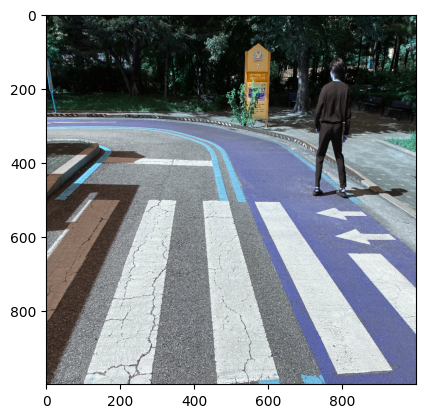

In [92]:
img = "C:/Users/user/Desktop/result/original/outside/IMG_3651.png"
img = cv2.imread(img)
plt.imshow(img)

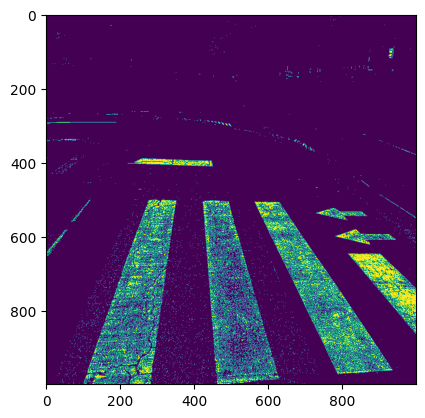

In [93]:
lower = (222,222,222 )
upper = (255, 255, 255)
thresh = cv2.inRange(img, lower, upper)
plt.imshow(thresh)

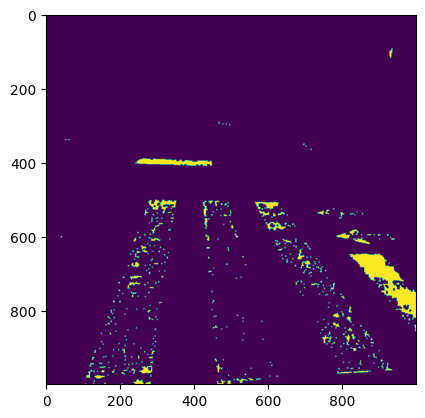

In [94]:
kernel = np.ones((3,3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
kernel = np.ones((5,5), np.uint8)
morph = cv2.morphologyEx(morph, cv2.MORPH_CLOSE, kernel)
plt.imshow(morph)

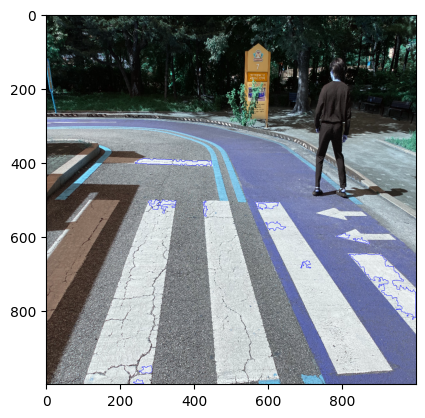

In [98]:
# # get contours
cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

# filter on area
contours = img.copy()
good_contours = []
for c in cntrs:
    area = cv2.contourArea(c)
    if area > 190 :
        cv2.drawContours(contours, [c], -1, (0,0,255), 1)
        good_contours.append(c)
plt.imshow(contours)

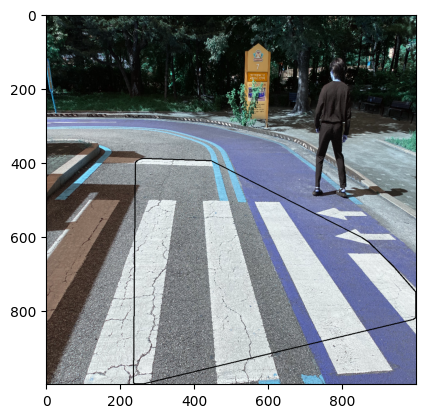

In [99]:
# # combine good contours
contours_combined = np.vstack(good_contours)
# # get convex hull

result = img.copy()
hull = cv2.convexHull(contours_combined)
cv2.polylines(result, [hull], True, (0,0,0), 2)

# write result to disk
plt.imshow(result)

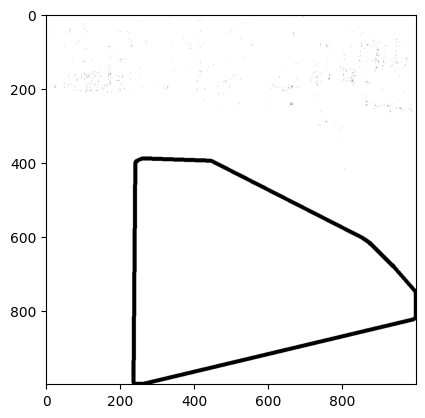

In [100]:
contours_combined = np.vstack(good_contours)

#색상 칠하기
result = img.copy()
hull = cv2.convexHull(contours_combined)
cv2.polylines(result, [hull], True, (0,0,0), 10)

#최소 , 최대 기준으로 흑백을 나눔
lower_del = (0 , 0 , 0)
upper_del = (1 ,1 ,1)
color_del = cv2.inRange(result, lower_del, upper_del)

#a = cv2.inRange(color_del,(200,200,200),(255,255,255))

#노이즈 제거
kernel_del = np.ones((1,1), np.uint8)
morph_del = cv2.morphologyEx(color_del, cv2.MORPH_OPEN, kernel_del)
kernel_del = np.ones((10,10), np.uint8)
morph_del = cv2.morphologyEx(morph_del, cv2.MORPH_CLOSE, kernel_del)
result = cv2.cvtColor(255-color_del, cv2.COLOR_BGR2RGB)

plt.imshow(result)